In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [5]:
df = pd.read_csv('u.data', sep = '\t', names = column_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
# merge the data frames so that we have the movie titles with ids
df = pd.merge(df, movie_titles, on = 'item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
sns.set_style('white')

In [12]:
# create a ratings df with average rating and number of ratings 

In [13]:
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()
# highest ratings

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()
# most ratings

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [17]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
# add a column to show the number of ratings to give some perspective
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [19]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


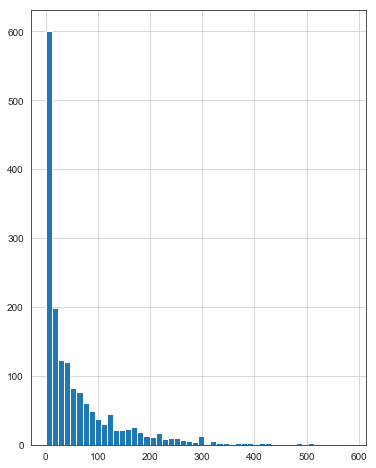

In [20]:
plt.figure(figsize = (6, 8))
ratings['num_of_ratings'].hist(bins = 50)

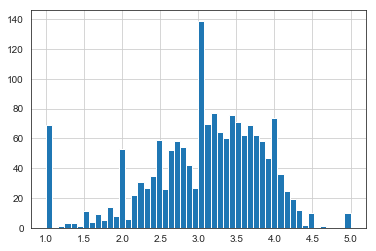

In [21]:
ratings['rating'].hist(bins = 50)

In [22]:
## building a reccomendation system for the data
# create matrix with user_ids and movie titles
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [41]:
# use pivot table to get this into matrix from
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
moviemat.head()
# NAN tells us that the user has not RATED this movie
## it does not tell us if the user has seen the movie

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
ratings.sort_values('num_of_ratings', ascending = False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [67]:
# grab the user ratings for StarWars(1977) and Liar Liar (1997)
# we can build recomendations off of these movies
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [68]:
starwars_user_ratings.head() # so we have a series of user_ids and the assocaited ratings

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [69]:
# we can use corrwith to find the correlation between pandas series
# corrwith will compute the correlation of two data frame objects
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
# so this gives a correlation list between star wars every other movie in the database
## assuming the movie has a rating
similar_to_starwars.head(10)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

In [70]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [71]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True) # dropping the NAN values
corr_starwars.head()
# we now have a df with continous correlation data

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [72]:
# we need to take a look at the data
corr_starwars.sort_values('Correlation', ascending = False).head(10)
# there are bunch of wierd movies that also recieved the same rating
# we need to correct for this by limiting our search to movies with multiple ratings
# this will remove the outlier spill over effects

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


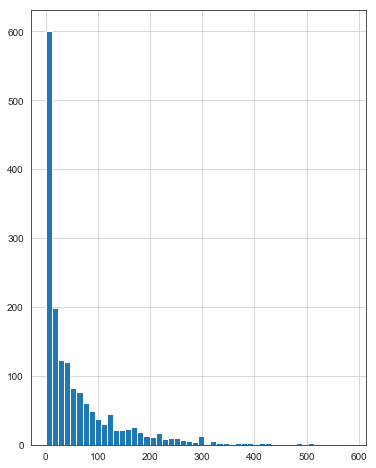

In [73]:
# establish a threshold for the number of ratings
## go back to the histogram that we built earlier
plt.figure(figsize = (6, 8))
ratings['num_of_ratings'].hist(bins = 50)
# so there are a large number of 0 ratings, we can choose a cut off point

In [74]:
# filter out movies that have less than 100 reviews
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
######### us join instead of merge because we have 'title' as part of the index  #######

In [75]:
corr_starwars.head() # we now added the number of ratings
# now we can filter for movies with less than 100 ratings

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [76]:
corr_starwars[corr_starwars['num_of_ratings']>= 100].sort_values('Correlation', ascending = False)

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [77]:
#so now we will do the same for liar liar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])

In [78]:
corr_liarliar.dropna(inplace = True)

In [79]:
corr_liarliar = corr_liarliar.join(ratings['num_of_ratings'])

In [80]:
corr_liarliar.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [82]:
corr_liarliar[corr_liarliar['num_of_ratings']>+ 100].sort_values('Correlation', ascending = False).head(10)

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
